In [57]:
import pytesseract
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
import bs4 as bs
import re

In [58]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [3]:
img = cv2.imread('demo.jpg')

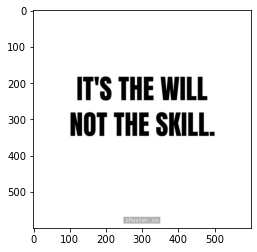

In [4]:
plt.imshow(img)

In [5]:
img2char = pytesseract.image_to_string(img)


In [6]:
print(img2char)

IT'S THE WILL
NOT THE SKILL.



In [7]:
img2box = pytesseract.image_to_boxes(img)
print(img2box)

I 122 352 135 416 0
T 138 352 166 416 0
' 169 393 182 416 0
S 184 351 216 417 0
T 235 352 264 416 0
H 268 352 299 416 0
E 305 352 332 416 0
W 351 352 403 416 0
I 387 352 411 416 0
L 406 352 450 416 0
L 454 352 480 416 0
N 103 253 135 318 0
O 140 253 172 319 0
T 175 253 204 318 0
T 223 253 251 318 0
H 255 253 287 318 0
E 292 253 319 318 0
S 339 253 371 319 0
K 375 253 408 318 0
I 409 253 422 318 0
L 427 253 454 318 0
L 443 253 467 319 0
. 457 253 500 318 0



In [8]:
type(img2box)

str

In [9]:
img.shape

(600, 600, 3)

In [10]:
imgH,imgW,_ = img.shape

In [11]:
for boxes in img2box.splitlines():
    boxes = boxes.split(' ')
    x,y,w,h = int(boxes[1]),int(boxes[2]),int(boxes[3]),int(boxes[4])
    cv2.rectangle(img,(x,imgH-y),(w,imgW-h),(0,0,225),3)

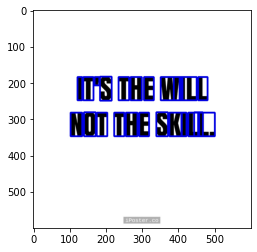

In [12]:
plt.imshow(img)

In [28]:
def ocr():
    font_scale = 1.5
    font = cv2.FONT_HERSHEY_PLAIN

    cap = cv2.VideoCapture(1)

    if not cap.isOpened():
        cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        raise IOError('No webcam found')

    cntr = 0
    while True:
        ret,frame = cap.read()
        cntr += 1
        if((cntr%20) == 0):
            imgH,imgW,_ = frame.shape
            x1,y1,w1,h1 = 0,0,imgH,imgW

            img1 = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            file = open("recognized.txt", "w")
            imgchar = pytesseract.image_to_string(Image.fromarray(img1))
            imgboxes = pytesseract.image_to_boxes(frame)
            for boxes in imgboxes.splitlines():
                boxes = boxes.split(' ')
                x,y,w,h = int(boxes[1]),int(boxes[2]),int(boxes[3]),int(boxes[4])
                cv2.rectangle(frame,(x,imgH-y),(w,imgH-h),(0,0,225),3)

            cv2.putText(frame, imgchar, (x1 + int(w1/50), y + int(h1/50)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (225,0,0), 3)
            font = cv2.FONT_HERSHEY_SIMPLEX
            file.write(imgchar)
            file.close

            cv2.imshow('Text Detection', frame)
            if cv2.waitKey(2) & 0XFF == ord('q'):
                break

    cap.release()
    cv2.destroyAllWindows()

In [59]:
ocr()

In [67]:
with open('recognized.txt', 'r') as txt:
    li = txt.readlines()
res1 = []
res = []
product_string = ''
for ele in li:
    if ele.strip():
        res += ele.split(' ')
        #res.append(ele)
alpha  = 'QWERTYUIOPASDFGHJKLZXCVBNMqwertyuiopasdfghjklzxcvbnm'
for i in res:
    if i[0] in alpha and len(i) > 2:
            res1.append(i)
print(res1)

['Amul\n', 'Cheese']


In [65]:
def edamam_food_api():   
    import requests
    url = "https://edamam-food-and-grocery-database.p.rapidapi.com/parser"
    for i in range(0, len(res1)):
        querystring = {}
        querystring['ingr'] = res1[i]

        headers = {
            'x-rapidapi-key': "19b3910850msheea1657a388e270p168743jsn232d02dddfa9",
            'x-rapidapi-host': "edamam-food-and-grocery-database.p.rapidapi.com"
            }

        r = requests.request("GET", url, headers=headers, params=querystring)
        products = r.json()
        if(products['hints'] == []):
                continue
        else:
            print('\n')
            name = products['hints'][0]['food']['label']
            print(f'Name : {name} \n')
            nutrients = products['hints'][0]['food']['nutrients']
            print(f'Nutrients : {nutrients} \n')

            key_to_lookup = 'foodContentsLabel'
            if key_to_lookup in products['hints'][0]['food']:
                contents = products['hints'][0]['food']['foodContentsLabel']
                print(f'Contents : {contents}')
            else:
                print("")

In [35]:
def calories_ninja():
    import requests
    for i in range(0,len(res1)):
        url = "https://calorieninjas.p.rapidapi.com/v1/nutrition"

        querystring = {}
        querystring['query'] = res1[i].lower().title()

        headers = {
            'x-rapidapi-key': "19b3910850msheea1657a388e270p168743jsn232d02dddfa9",
            'x-rapidapi-host': "calorieninjas.p.rapidapi.com"
            }

        response = requests.request("GET", url, headers=headers, params=querystring)
        product = response.json()
        if product['items'] == []:
            continue
        else:
            print(product['items'])

In [36]:
def wiki_translate():
    import urllib as url
    from googletrans import Translator

    translator = Translator()
    lan = input("Enter language:")

    for i in range(0,len(res1)):
        print(res1[i])
        link = ("https://en.wikipedia.org/wiki/{}".format(res1[i].lower()))
        page = url.request.urlopen(link).read() 
        soup = bs.BeautifulSoup(page, 'lxml')
        text = ''
        for para in soup.find_all('p'):
            text += para.text
            text = re.sub(r'\[[0-9]*\]',' ',text)
            text = re.sub(r'\s+',' ',text)
            txt = text.split('.')
            deets = txt[:5]

        if lan == "english": 
            print(deets)
        else:
            if lan == "hindi": 
                translations = translator.translate(deets, dest='hi')

            if lan == "spanish": 
                translations = translator.translate(deets, dest='es')

            if lan == "french": 
                translations = translator.translate(deets, dest='fr')

            if lan == "german": 
                translations = translator.translate(deets, dest='ge')

            if lan == "japanese": 
                translations = translator.translate(deets, dest='ja')

            for translation in translations:
                    print(translation.text)

In [68]:
edamam_food_api()
calories_ninja()
wiki_translate()



Name : Amul Cheese Slices 7.06 Oz 

Nutrients : {'ENERC_KCAL': 350.0, 'PROCNT': 20.0, 'FAT': 25.0, 'CHOCDF': 0.0} 

Contents : Cheddar Cheese ( Milk; Cheese Culture; Salt And Enzymes ); Sodium Citrate; Sodium Phospate; Milk Solids; Salt; Citric Acid And Water; Sorbic Acid E 200 And Nisin As Preservatives.


Name : Cheese 

Nutrients : {'ENERC_KCAL': 406.0, 'PROCNT': 24.04, 'FAT': 33.82, 'CHOCDF': 1.33, 'FIBTG': 0.0} 


[{'sugar_g': 0.5, 'fiber_g': 0.0, 'serving_size_g': 100.0, 'sodium_mg': 661, 'name': 'cheese', 'potassium_mg': 459, 'fat_saturated_g': 18.9, 'fat_total_g': 33.0, 'calories': 393.9, 'cholesterol_mg': 100, 'protein_g': 22.7, 'carbohydrates_total_g': 3.2}]
Enter language:english
Amul

[' Amul, is an Indian dairy cooperative society, based at Anand in the Indian state of Gujarat', ' Formed in 1946, it is a cooperative brand managed by a cooperative body, the Gujarat Co-operative Milk Marketing Federation Ltd', ' (GCMMF), which today is jointly owned by 36 lakh (3', '6 mill